In [154]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
ds, info = tfds.load('mnist', split='train', shuffle_files=True, as_supervised=True, with_info=True)

In [167]:
MIN_NUM_OBJECTS = 5

OBJ_HEIGHT = 28
OBJ_WIDTH = 28
 
IMG_HEIGHT = OBJ_HEIGHT * 8
IMG_WIDTH = OBJ_WIDTH * 8

image = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1))

2024-04-23 08:57:42.469860: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-23 08:57:42.470284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


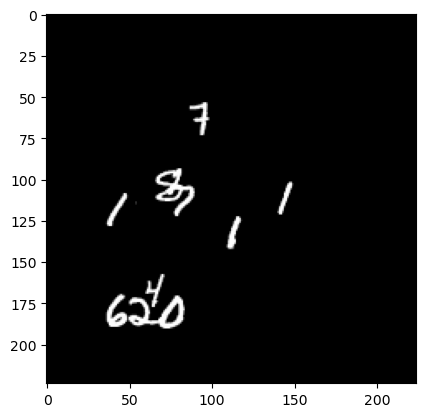

In [163]:
import random

MARGIN_Y = OBJ_HEIGHT
MARGIN_X = OBJ_WIDTH

for features, labels in ds.take(10):
    # pick a random position, subject to margin constraints
    y_pos = int(max(MARGIN_Y, min(random.random() * IMG_HEIGHT, IMG_HEIGHT - MARGIN_Y*2)))
    x_pos = int(max(MARGIN_X, min(random.random() * IMG_WIDTH, IMG_WIDTH - MARGIN_X*2)))
    
    # paste the pixels at that position, using bit-wise OR to allow for overlapping objects
    image[y_pos:y_pos+OBJ_HEIGHT, x_pos:x_pos+OBJ_WIDTH] = image[y_pos:y_pos+OBJ_HEIGHT, x_pos:x_pos+OBJ_WIDTH] | features

plt.imshow(image, cmap='gray')
plt.show()

### Let's rewrite it for saving (generated)

In [231]:
from PIL import Image
import os

os.makedirs('generated/mnist-detection/images', exist_ok=True)
os.makedirs('generated/mnist-detection/labels', exist_ok=True)

def save_example(filename, image, label_rows=[]):
    # save image file
    img = Image.fromarray(image.squeeze(), mode='L')
    with open(os.path.join('generated', 'mnist-detection', 'images', f'{filename}.png'), 'wb') as f:
        img.save(f)
    
    # save label file
    with open(os.path.join('generated', 'mnist-detection', 'labels', f'{filename}.txt'), 'w') as f:
        for row in label_rows:
            label, x_rel, y_rel, w_rel, h_rel = row
            txt_rows = f'{label}\t{x_rel}\t{y_rel}\t{w_rel}\t{h_rel}\n'
            f.write(txt_rows)

In [232]:
import random

NUM_EXAMPLES = 10

BATCH_SIZE = MIN_NUM_OBJECTS
batches = ds.batch(BATCH_SIZE)

for i in range(NUM_EXAMPLES):
    image = np.zeros((IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.uint8)
    label_rows = []
    for features, labels in batches.skip(i*BATCH_SIZE).take(1):
        for j in range(features.shape[0]):
            # pick a random position, subject to margin constraints
            y_pos = int(max(MARGIN_Y, min(random.random() * IMG_HEIGHT, IMG_HEIGHT - MARGIN_Y*2)))
            x_pos = int(max(MARGIN_X, min(random.random() * IMG_WIDTH, IMG_WIDTH - MARGIN_X*2)))
            
            # paste the pixels at that position, using bit-wise OR to allow for overlapping objects
            image[y_pos:y_pos+OBJ_HEIGHT, x_pos:x_pos+OBJ_WIDTH] = image[y_pos:y_pos+OBJ_HEIGHT, x_pos:x_pos+OBJ_WIDTH] | features[j]
            
            y_rel = y_pos / IMG_HEIGHT
            x_rel = x_pos / IMG_WIDTH
            w_rel = OBJ_WIDTH / IMG_WIDTH
            h_rel = OBJ_HEIGHT / IMG_HEIGHT
            label_rows.append((labels[j], x_rel, y_rel, w_rel, h_rel))
    save_example(f'{i+1:0{int(len(str(NUM_EXAMPLES)))}}', image, label_rows)

2024-04-23 09:36:55.653389: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-04-23 09:36:55.657141: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-04-23 09:36:55.703671: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.